### Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("after_preprocessing.csv")
data

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,angina,st_depression,slope,fluorosopy_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
298,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
299,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
300,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Univariate Analysis
In this analysis we consider individual attributes.
### Target
There are 2 possibilities, 0 and 1 which mean that a person has heart disease and doesn't have heart disease respectively. This is the attribute which we will want to predict later so, let's see it's frequency distribution.

In [61]:
data['target'].unique()

array([1, 0])

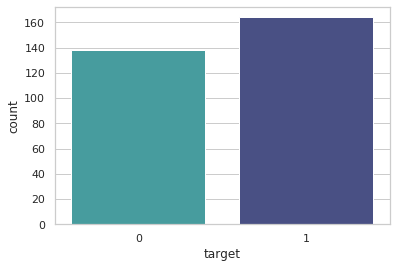

Percentage of Patients with no Heart Disease: 45.70%
Percentage of Patients with Heart Disease: 54.30%


In [62]:
sns.countplot(x="target", data=data, palette="mako_r")
plt.show()

countNoDisease = len(data[data['target'] == 0])
countHaveDisease = len(data[data['target'] == 1])
total=len(data.index)
print("Percentage of Patients with no Heart Disease: {:.2f}%".format(countNoDisease/total*100))
print("Percentage of Patients with Heart Disease: {:.2f}%".format(countHaveDisease /total*100))

### Gender
There are 2 possibilities, 0 and 1 which means female and male respectively. 

In [63]:
data['gender'].unique()

array([1, 0])

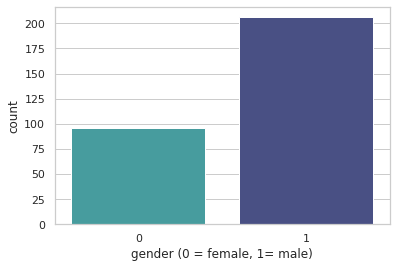

Percentage of female patients : 31.79%
Percentage of male patients: 68.21%


In [64]:
sns.countplot(x='gender', data=data, palette="mako_r")
plt.xlabel("gender (0 = female, 1= male)")
plt.show()

male = len(data[data['gender'] == 1])
female = len(data[data['gender'] == 0])
print("Percentage of female patients : {:.2f}%".format(female/total*100))
print("Percentage of male patients: {:.2f}%".format(male/total*100))

### Chest Pain Type
There are 4 possibilities. 

In [65]:
data['chest_pain_type'].unique()

array([3, 2, 1, 0])

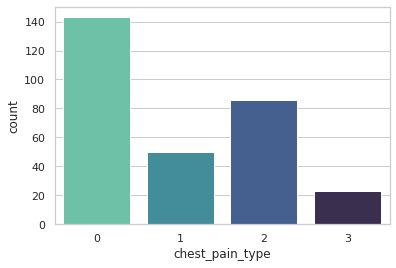

In [66]:
sns.countplot(x="chest_pain_type", data=data, palette='mako_r')
plt.show()

### Maximum Heart Rate
This attribute a range of values, so a distribution plot is used to observe this. We can see that it is slightly negatively skewed.

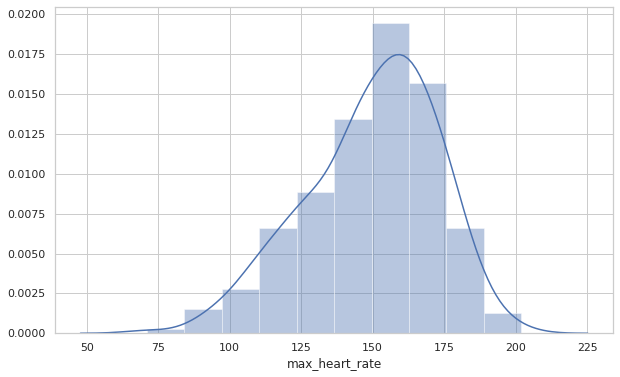

In [67]:
plt.subplots(figsize=(10,6))
x = data['max_heart_rate']
sns.distplot(x, bins=10)
sns.set(style="whitegrid")
plt.show()

This kind of analysis can be repeated for all the variables. Consider the histogram for all the 14 attributes.

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


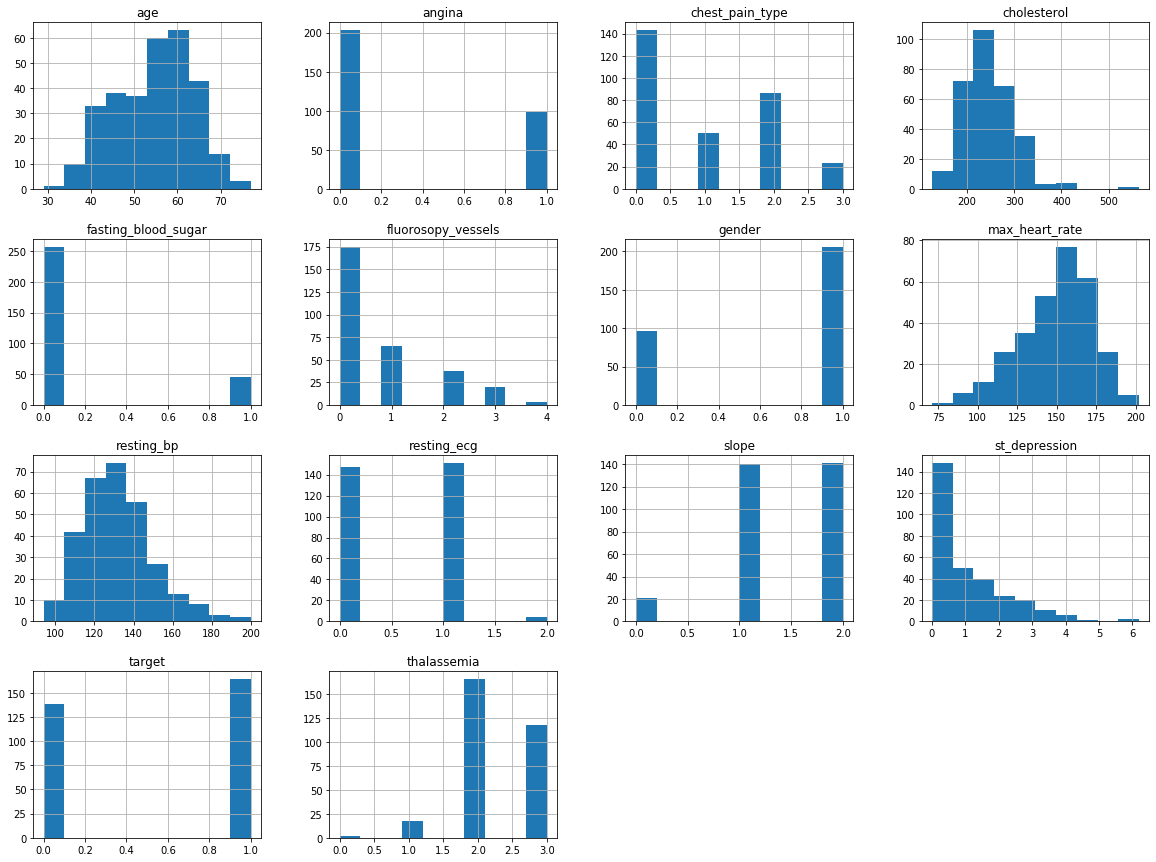

In [34]:
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
data.hist(ax=ax)
plt.show()

## Bivariate Analysis
In this analysis we consider the relationship between 2 attributes.
### Target and Gender

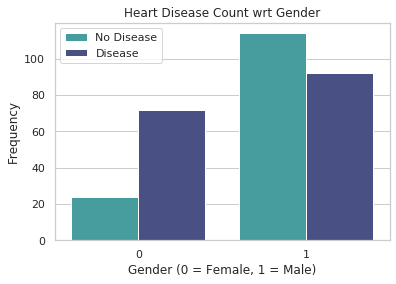

In [68]:
sns.countplot(x='gender',hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Count wrt Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.legend(["No Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

### Target and Chest Pain Type

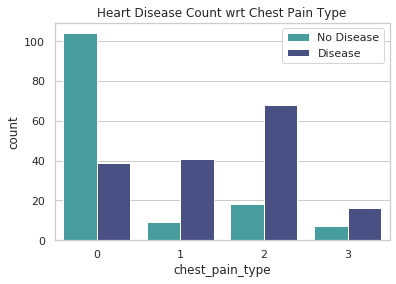

In [69]:
sns.countplot(x='chest_pain_type', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Count wrt Chest Pain Type')
plt.legend(["No Disease", "Disease"])
plt.show()

### Target and Maximum Heart Rate
Since max_heart_rate has a range of values, a swarm plot and box plot are used to observe the distribution. It can be observed that people suffering from heart disease have relatively higher heart rate.

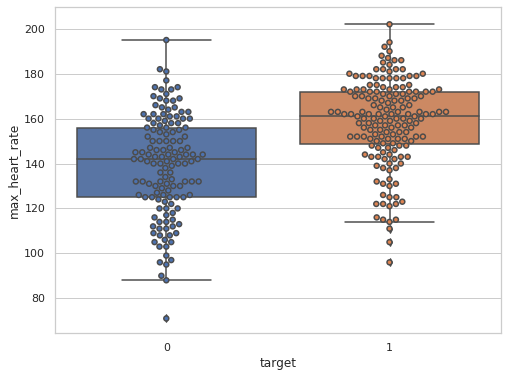

In [78]:
f, ax = plt.subplots(figsize=(8, 6))
sns.swarmplot(x="target", y="max_heart_rate", data=data, edgecolor='gray', linewidth=1.5)
sns.boxplot(x="target", y="max_heart_rate", data=data)
plt.show()

### Target and Age
Since age has a range of values, a swarm plot and box plot are used to observe the distribution. It can be observed that people suffering from heart disease are relatively younger.

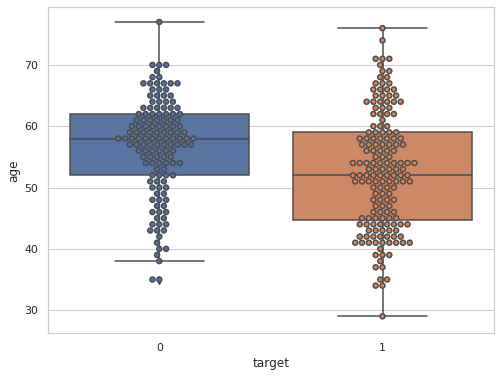

In [82]:
f, ax = plt.subplots(figsize=(8, 6))
sns.swarmplot(x="target", y="age", data=data, edgecolor='gray', linewidth=1.5)
sns.boxplot(x="target", y="age", data=data)
plt.show()

### Age and Maximum Heart Rate
Due to above the 2 observations, let us see the scatter plot as well as a line plot of these 2 variables. We can observe that younger people with higher heart rate tend to have heart disease.

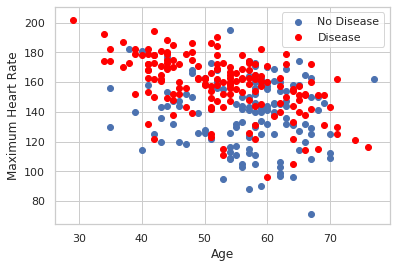

In [87]:
plt.scatter(x=data['age'][data['target']==0], y=data['max_heart_rate'][(data['target']==0)],label='No Disease')
plt.scatter(x=data['age'][data['target']==1], y=data['max_heart_rate'][(data['target']==1)], c="red", label='Disease')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend()
plt.show()

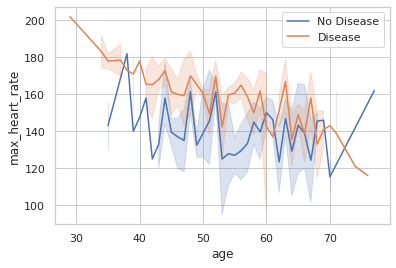

In [91]:
sns.lineplot(x="age", y="max_heart_rate", hue="target",data=data)
plt.legend(['No Disease','Disease'])
plt.show()

## Multivariate Analysis
Now, we'll analyse multiple/all variables. First let's find the correlation between attributes and get the corresponding heat map.

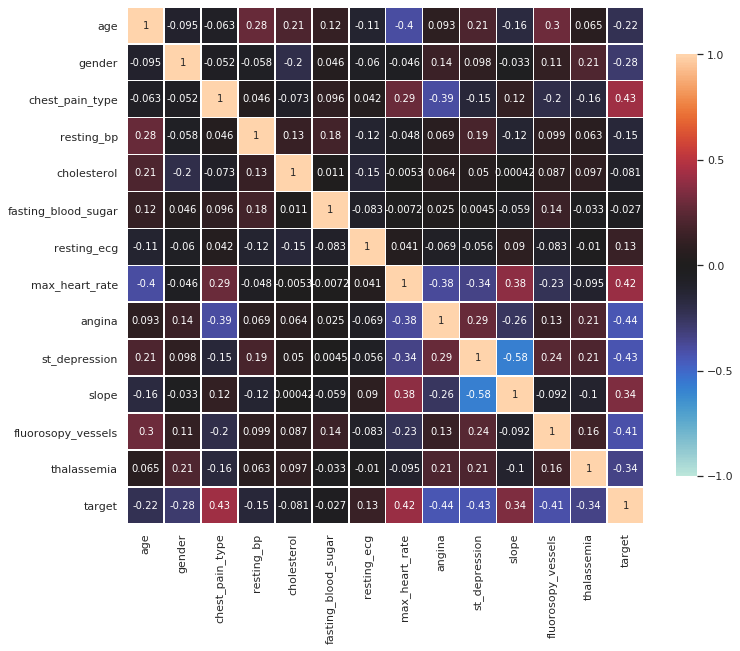

In [88]:
plt.figure(figsize=(11,15))
sns.heatmap(data.corr(),
            vmin = -1, 
            vmax = 1,
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
            annot_kws = {"size": 10},
            annot=True)
plt.tight_layout()
plt.show()

Since there are n=302 rows in the dataset, the degrees of freedom is n-2=300. For a significance level of 0.05, the critical value of r with a two tailed test is 0.113. Any correlation value which exceeds this would be considered as significant. 
